In [11]:
import pandas as pd

# ファイルを読み込む
df = pd.read_csv('resampled_push_edit.csv')

# データフレームを表示
print(df)

          cali1   cali2
0     -0.034158  0.0114
1     -0.047899  0.0115
2     -0.053312  0.0116
3     -0.036405  0.0117
4     -0.054861  0.0118
...         ...     ...
89979 -4.042740 -4.8300
89980 -4.078761 -4.8300
89981 -4.102312 -4.8300
89982 -4.061240 -4.8300
89983 -4.093513 -4.8300

[89984 rows x 2 columns]


In [12]:
import numpy as np

# オフセットを計算して差し引く
df['cali1'] = df['cali1'] - df['cali1'].mean()
df['cali2'] = df['cali2'] - df['cali2'].mean()

# トレンドを計算して差し引く
x = np.arange(len(df))
df['cali1'] = df['cali1'] - np.poly1d(np.polyfit(x, df['cali1'], 1))(x)
df['cali2'] = df['cali2'] - np.poly1d(np.polyfit(x, df['cali2'], 1))(x)

correlation = np.correlate(df['cali1'], df['cali2'], mode='full')

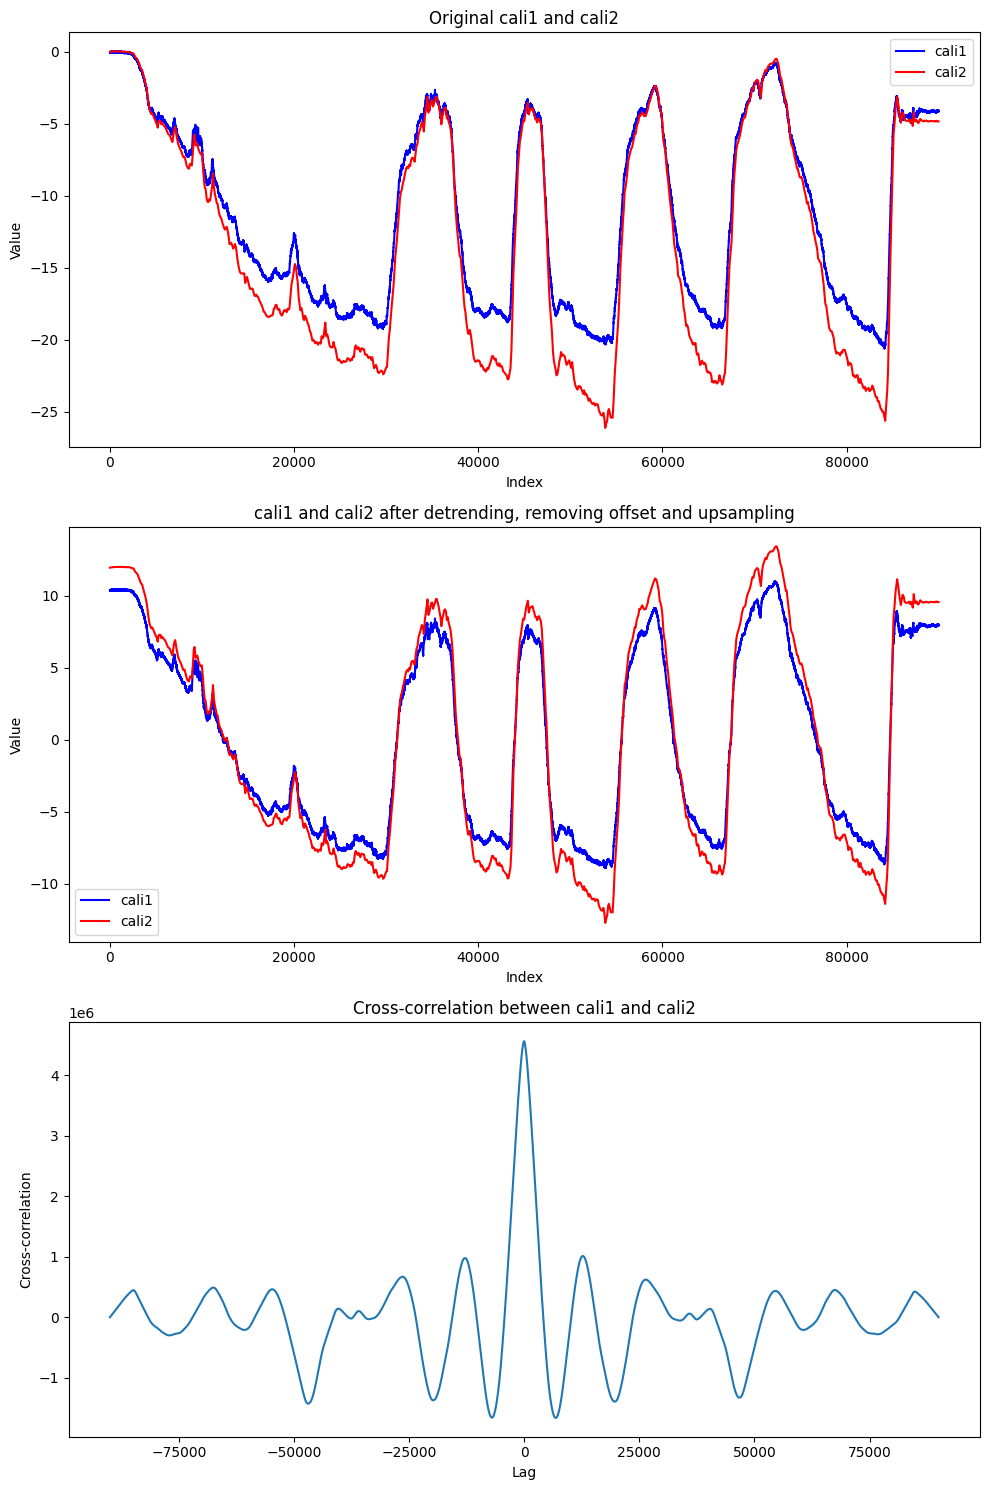

Lag with maximum correlation:  0


In [13]:
import matplotlib.pyplot as plt

# ファイルを読み込む
df_original = pd.read_csv('resampled_push_edit.csv')

# プロットの準備
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# オリジナルのcali1とcali2のプロット
x = np.arange(len(df_original['cali1']))
axs[0].plot(x, df_original['cali1'], label='cali1', color='blue')
axs[0].plot(x, df_original['cali2'], label='cali2', color='red')
axs[0].set_title('Original cali1 and cali2')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].legend()  # 凡例を表示

# 処理後のcali1とcali2のプロット
axs[1].plot(x, df['cali1'], label='cali1', color='blue')
axs[1].plot(x, df['cali2'][:len(df['cali1'])], label='cali2', color='red')  # cali2はアップサンプリングされているのでスライスする
axs[1].set_title('cali1 and cali2 after detrending, removing offset and upsampling')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].legend()  # 凡例を表示

# 相互相関関数のプロット
lags = np.arange(-len(df['cali1']) + 1, len(df['cali1']))
axs[2].plot(lags, correlation)
axs[2].set_title('Cross-correlation between cali1 and cali2')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Cross-correlation')

# レイアウト調整
plt.tight_layout()

# プロットの表示
plt.show()

# 相互相関関数の最大値を持つラグを計算
max_corr_lag = lags[np.argmax(correlation)]

print("Lag with maximum correlation: ", max_corr_lag)

CORRELATION - > Cali2 REMOVE
CORRELATION + > Cali1 REMOVE
